# IFT 6758 - Devoir 2

In [5]:
%load_ext autoreload
%autoreload 2

## Question 1

### a)
Commencez par utiliser les fonctions créées dans `q1.py` pour rendre les données plus informatives et lisibles. Concrètement, remplissez les cellules suivantes :


In [4]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from q1 import count_labels, convert_id, convert_ids, contains_label, get_correlation

sns.set(style="ticks")

In [7]:
# Charger le fichier `audio_segments.csv` dans un DataFrame `df`
path = './data/audio_segments.csv'
df = pd.read_csv(path)

df.head()

,# YTID,start_seconds,end_seconds,positive_labels
0,--4gqARaEJE,0.0,10.0,"/m/068hy,/m/07q6cd_,/m/0bt9lr,/m/0jbk"
1,--BfvyPmVMo,20.0,30.0,/m/03l9g
2,--U7joUcTCo,0.0,10.0,/m/01b_21
3,--i-y1v8Hy8,0.0,9.0,"/m/04rlf,/m/09x0r,/t/dd00004,/t/dd00005"
4,-0BIyqJj9ZU,30.0,40.0,"/m/07rgt08,/m/07sq110,/t/dd00001"


In [8]:
# Ajouter une colonne correspondant au nombre d'étiquettes appelée `label_count`
# Ici, il y a un problème ennuyeux avec l'accès à la colonne positive_labels
df.columns = df.columns.str.strip()
df['label_count'] = df["positive_labels"].apply(count_labels)


In [11]:
# Ajouter une nouvelle colonne appelée `label_names` avec les noms d'étiquette traités au lieu de l'ID d'étiquette

# Imprimer le temps pris pour cette opération (soit en utilisant le module time ou timeit).
# Puisque nous n'exécutons ce code qu'une fois, ce n'est pas très problématique que cela prenne quelques minutes.
# Cependant, pour un ensemble de données plus volumineux, cela vaudrait la peine de l'accélérer
# (par exemple en créant un dictionnaire ID -> nom une fois et en l'utilisant).

start_time = time.time()
df['label_names'] = df["positive_labels"].apply(convert_ids)
end_time = time.time()

print(end_time - start_time)


176.03567814826965


In [12]:
# Affichez le DataFrame et enregistrez-le dans `audio_segments_clean.csv` (sans index)

print(df.head())

df.to_csv('audio_segments_clean.csv', index=False)


        # YTID  start_seconds  end_seconds  \
0  --4gqARaEJE            0.0         10.0   
1  --BfvyPmVMo           20.0         30.0   
2  --U7joUcTCo            0.0         10.0   
3  --i-y1v8Hy8            0.0          9.0   
4  -0BIyqJj9ZU           30.0         40.0   

                           positive_labels  label_count  \
0    /m/068hy,/m/07q6cd_,/m/0bt9lr,/m/0jbk            4   
1                                 /m/03l9g            1   
2                                /m/01b_21            1   
3  /m/04rlf,/m/09x0r,/t/dd00004,/t/dd00005            4   
4         /m/07rgt08,/m/07sq110,/t/dd00001            3   

                                  label_names  
0    Domestic animals, pets|Squeak|Dog|Animal  
1                                      Hammer  
2                                       Cough  
3   Music|Speech|Female singing|Child singing  
4  Chuckle, chortle|Belly laugh|Baby laughter  


### b)

Ensuite, à l'aide du DataFrame propre, remplissez les cellules suivantes pour mieux comprendre la distribution des étiquettes dans l'ensemble de données. Pour chaque graphique ci-dessous, assurez-vous d'inclure les **noms d'axe** appropriés et un **titre**.

[Text(0.5, 1.0, "Histogramme du nombre d'etiquettes"),
 Text(0.5, 0, 'Occurances de cette qte de Labels'),
 Text(0, 0.5, 'Qte de Labels')]

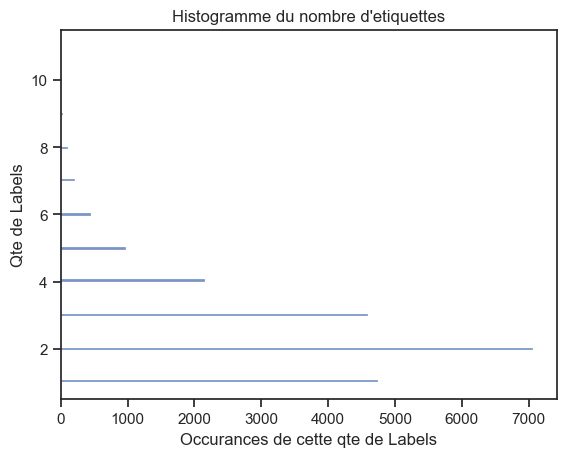

In [13]:
# À l'aide de seaborn, créez un histogramme du nombre d'étiquettes des rangées dans le DataFrame
# TODO

sb = sns.histplot(df, y='label_count', stat='count')
sb.set(title="Histogramme du nombre d'etiquettes",xlabel='Occurances de cette qte de Labels', ylabel='Qte de Labels')


Suivez les étapes ci-dessous pour créer un heatmap montrant la "corrélation" entre différentes étiquettes.
- Plus précisément, chaque cellule de la heatmap doit correspondre à la probabilité qu'un échantillon avec l'étiquette de ligne correspondante ait également l'étiquette de colonne correspondante.
- Considérez simplement les étiquettes ["Piano", "Classical music", "Speech", "Conversation", "Screaming"].

Votre graphique final devrait ressembler à ceci :

![alt text](images/heatmap.png "Heatmap")

c:\Dev\Ecole\hw2\release_fr\q1.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return labels[labels.str.contains(regex)]


<Axes: >

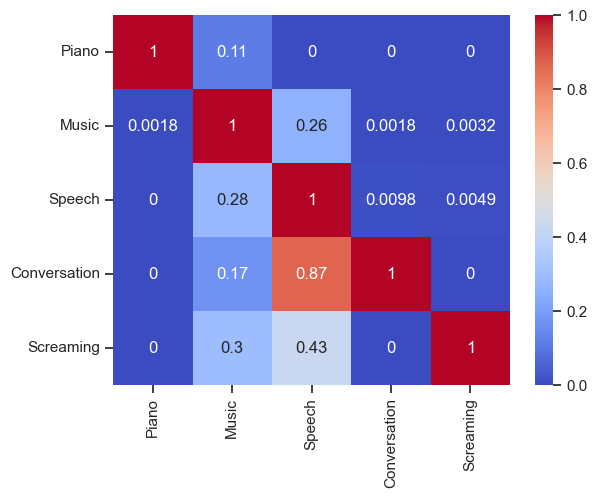

In [14]:
labels = ["Piano", "Music", "Speech", "Conversation", "Screaming"]

# Il y a plusieurs façons d'aborder cela, la façon que nous recommandons ici est de construire d'abord une grille 2D où chaque
# value est la valeur de corrélation entre la ligne/colonne correspondante à l'aide des fonctions créées dans q1.py.

n = len(labels)
correlation_matrix = np.zeros((n, n))



for i in range(n):
    for j in range(n):
        correlation_matrix[i, j] = get_correlation(df['label_names'],label_1=labels[i], label_2=labels[j])
        
# Ensuite, à l'aide de sns.heatmap, créez la heatmap, en profitant de xticklabels et yticklabels pour définir les noms des étiquettes comme valeurs de graduation
sns.heatmap(correlation_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap="coolwarm")

## Question 2
La question 2 n'a pas de composante notebook, remplissez simplement le fichier `q2.py`.

## Question 3

Téléchargez l'audio pour les étiquettes suivantes à l'aide des fonction créées dans `q3.py`

In [15]:
from q3 import data_pipeline, rename_files, filter_df

In [16]:
# Téléchargez "Cough"

data_pipeline('audio_segments_clean.csv', 'Cough')

# Renommez les fichiers pour inclure le début et fin des échantillons ainsi que la durée

rename_files(path_cut='Cough_cut', csv_path='audio_segments_clean.csv')

 10%|█         | 6/60 [00:00<00:02, 27.00it/s]

ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)


 22%|██▏       | 13/60 [00:00<00:01, 30.67it/s]

ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)


 35%|███▌      | 21/60 [00:00<00:01, 32.34it/s]

ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)


 42%|████▏     | 25/60 [00:00<00:01, 31.04it/s]

ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)


 55%|█████▌    | 33/60 [00:01<00:00, 29.08it/s]

ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)


 65%|██████▌   | 39/60 [00:01<00:00, 27.76it/s]

ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)


 70%|███████   | 42/60 [00:01<00:00, 26.09it/s]

ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)


 80%|████████  | 48/60 [00:01<00:00, 22.48it/s]

ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)


 85%|████████▌ | 51/60 [00:01<00:00, 20.51it/s]

ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)


 93%|█████████▎| 56/60 [00:02<00:00, 18.42it/s]

ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)


100%|██████████| 60/60 [00:02<00:00, 24.27it/s]

ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)


In [6]:
# Téléchargez "Hammer"

data_pipeline('audio_segments_clean.csv', 'Hammer')

# Renommez les fichiers pour inclure le début et fin des échantillons ainsi que la durée

rename_files(path_cut='Hammer_cut', csv_path='audio_segments_clean.csv')

  0%|          | 0/60 [00:00<?, ?it/s]

ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)


 12%|█▏        | 7/60 [00:00<00:02, 20.02it/s]

ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)


 22%|██▏       | 13/60 [00:00<00:02, 22.40it/s]

ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)


 32%|███▏      | 19/60 [00:00<00:01, 23.52it/s]

ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)


 42%|████▏     | 25/60 [00:01<00:01, 24.47it/s]

ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)


 52%|█████▏    | 31/60 [00:01<00:01, 24.69it/s]

ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)


 57%|█████▋    | 34/60 [00:01<00:01, 23.71it/s]

ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)


 67%|██████▋   | 40/60 [00:01<00:00, 21.22it/s]

ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)


 77%|███████▋  | 46/60 [00:02<00:00, 21.51it/s]

ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)


 87%|████████▋ | 52/60 [00:02<00:00, 23.77it/s]

ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)


 97%|█████████▋| 58/60 [00:02<00:00, 24.87it/s]

ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)
ffmpeg error (see stderr output for detail)


100%|██████████| 60/60 [00:02<00:00, 23.10it/s]

ffmpeg error (see stderr output for detail)


Comme vous l'avez probablement remarqué, le téléchargement de toutes ces données audio est lent (et en tant que tel, nous vous avons uniquement demandé de télécharger 2 des étiquettes). Dans de nombreux cas, il est possible d'obtenir des augmentations de performances significatives en utilisant soit le multiprocessing (https://docs.python.org/3/library/multiprocessing.html) soit le multithreading (https://docs.python.org/3/library/threading.html)  qui pourrait par exemple vous permettre de télécharger plusieurs fichiers audio en parallèle.

En règle générale, utilisez le multithreading lorsque vos programmes sont bloqués par l'IO (par exemple ici) et le multiprocessing lorsqu'ils sont bloqués CPU (et utilisez ainsi tous les cores de votre CPU).

## Question 4
Pour les cellules suivantes, utilisez l'ID "0GNNFBrRz1E". Complétez les fonctions et exécutez les cellules fournies ci-dessous.

In [18]:
import librosa

In [2]:
# Jouez le segment audio dans le notebook en utilisant
# https://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.Audio

from IPython.display import Audio
from os import path

# 40,50
# 0GNNFBrRz1E
Audio(path.join("Hammer_cut", "0GNNFBrRz1E_40_50_10.mp3"))

Une façon de visualiser l'audio consiste à utiliser des spectrogrammes mel. Brièvement, les spectrogrammes Mel convertissent l'audio en une image 2D grâce à l'utilisation de Fourier Transforms (plus de détails peuvent être trouvés ici: https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53).

In [20]:
stft_hopsize = 128
n_fft = 512
sample_rate = 16000

def to_log_scale(mel: np.ndarray) -> np.ndarray:
    mel = np.log(mel + 1e-6)/2.0
    return mel

def create_mel_spectrogram(mp3_path: str) -> np.ndarray:
    """ 

    En utilisant librosa (https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html) écrivez une fonction qui:
    1. Charge l'audio à partir d'un mp3_path (en utilisant librosa)
    2. Le convertit en un spectrogramme mel (en utilisant les paramètres fournis ci-dessus)
    3. Applique la transformation d'échelle logarithmique au spectrogramme mel (fourni ci-dessus une fois de plus)
    4. Renvoie le spectrogramme mel transformé

    Assurez-vous de passer le sample rate
    """


    y, sr = librosa.load(mp3_path, sr=sample_rate)
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=stft_hopsize)
    mel_spectrogram_log = to_log_scale(mel_spectrogram)
    return mel_spectrogram_log

create_mel_spectrogram("Hammer_cut/0GNNFBrRz1E_40_50_10.mp3")

array([[-6.9077554, -6.9077554, -6.9077554, ..., -3.1737201, -3.187172 ,
        -3.8651216],
       [-6.9077554, -6.9077554, -6.9077554, ..., -3.0575044, -3.1075757,
        -3.8489416],
       [-6.9077554, -6.9077554, -6.9077554, ..., -2.9538145, -3.0300908,
        -3.8258355],
       ...,
       [-6.9077554, -6.9077554, -6.9077554, ..., -6.4402447, -6.45173  ,
        -6.7129316],
       [-6.9077554, -6.9077554, -6.9077554, ..., -6.713315 , -6.686768 ,
        -6.8372755],
       [-6.9077554, -6.9077554, -6.9077554, ..., -6.8911138, -6.899829 ,
        -6.900391 ]], dtype=float32)

Les données audio peuvent également être visualisées en regardant la forme d'onde (c'est-à-dire sous la forme d'un tracé linéaire des valeurs d'amplitude). Nous combinerons les deux méthodes de visualisation ci-dessous. Le graphique résultant devrait ressembler à :
![alt text](images/combined_plot.png "Combined Plot")

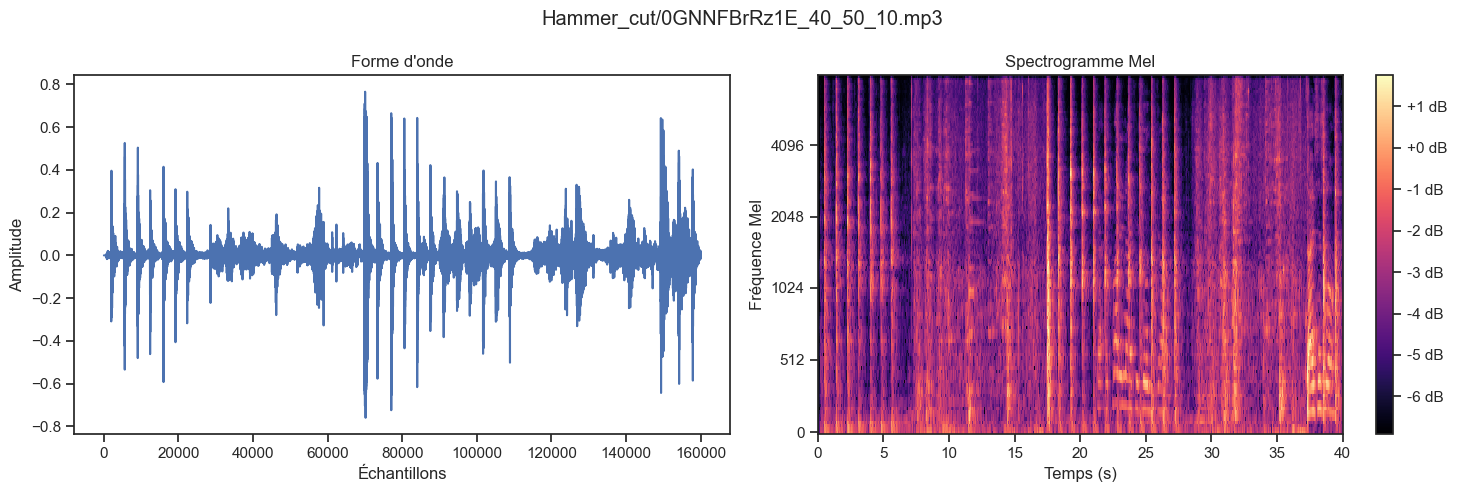

In [21]:
def plot_audio(mp3_path: str) -> None:
    """ 
    En utilisant matplotlib et create_mel_spectrogram() écrivez une fonction qui prend un mp3_path et trace
    à la fois la forme d'onde (graphique linéaire des amplitudes) et le spectrogramme mel côte à côte en tant que subplots.

    Utilisez le mp3_path comme titre principal unique pour tout le graphique
    """

    y, sr = librosa.load(mp3_path, sr=sample_rate)
    mel_spectrogram = create_mel_spectrogram(mp3_path)
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    axs[0].plot(y)
    axs[0].set_title('Forme d\'onde')
    axs[0].set_xlabel('Échantillons')
    axs[0].set_ylabel('Amplitude')

    img = librosa.display.specshow(mel_spectrogram, sr=sr, x_axis='time', y_axis='mel', ax=axs[1])
    axs[1].set_title('Spectrogramme Mel')
    axs[1].set_xlabel('Temps (s)')
    axs[1].set_ylabel('Fréquence Mel')

    fig.colorbar(img, ax=axs[1], format='%+2.0f dB')
    plt.suptitle(mp3_path)
    plt.tight_layout()
    plt.show()
    

plot_audio("Hammer_cut/0GNNFBrRz1E_40_50_10.mp3")